### Measurement uncertainties from the total SFR from the MPA-JHU catalog 
We're interested in quantifying the measurement uncertainty from repeat spectra in Brinchmann's SFR catalog

In [1]:
import numpy as np 
import scipy as sp 

import env
import util as UT
from ChangTools.fitstables import mrdfits

In [2]:
from pydl.pydlutils.spheregroup import spherematch

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in the total SFRs from https://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/sfrs.html . These SFRs are derived from spectra but later aperture corrected using Salim et al.(2007)'s method. 

In [4]:
# data with the galaxy information
data_gals = mrdfits(UT.dat_dir()+'gal_info_dr7_v5_2.fit.gz')
# data with the SFR information 
data_sfrs = mrdfits(UT.dat_dir()+'gal_totsfr_dr7_v5_2.fits.gz')

if len(data_gals.ra) != len(data_sfrs.median):
    raise ValueError("the data should have the same number of galaxies")

`spherematch` using 3'' for 10,000 galaxies. Otherwise laptop explodes.

In [5]:
#ngal = len(data_gals.ra)
ngal = 10000

In [6]:
matches = spherematch(data_gals.ra[:10000], data_gals.dec[:10000], 
                      data_gals.ra[:10000], data_gals.dec[:10000], 
                      0.000833333, maxmatch=0)

In [7]:
m0, m1, d_m = matches

In [8]:
n_matches = np.zeros(ngal)
sfr_list = [[] for i in range(ngal)]

for i in range(ngal): 
    ism = (i == m0)
    n_matches[i] = np.sum(ism)
    if n_matches[i] > 1:         
        #print '#', data_gals.ra[i], data_gals.dec[i], data_sfrs.median[i]
        sfr_list[i] = data_sfrs.median[m1[np.where(ism)]]
        #for r,d,s in zip(data_gals.ra[m1[np.where(ism)]], data_gals.dec[m1[np.where(ism)]], data_sfrs.median[m1[np.where(ism)]]): 
        #    print r, d, s
    #sfr_list[i] = data_sfrs.median[:10000][ism]

In [9]:
for i in np.where(n_matches > 1)[0][:5]: 
    print sfr_list[i] 
    print np.mean(sfr_list[i]), np.std(sfr_list[i])

[-0.46492234 -0.51970792]
-0.492315 0.0273928
[ 0.25182927  0.17580664]
0.213818 0.0380113
[-0.71020395 -0.64012742]
-0.675166 0.0350383
[-99. -99.]
-99.0 0.0
[-0.32268193 -0.12419786]
-0.22344 0.099242


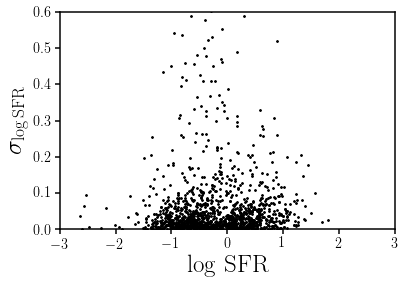

In [10]:
fig = plt.figure()
sub = fig.add_subplot(111)
sigs = []
for i in np.where(n_matches > 1)[0]: 
    if -99. in sfr_list[i]:
        continue
    sub.scatter([np.mean(sfr_list[i])], [np.std(sfr_list[i], ddof=1)], c='k', s=2)
    sigs.append(np.std(sfr_list[i], ddof=1))
sub.set_xlim([-3., 3.])
sub.set_xlabel('log SFR', fontsize=25)
sub.set_ylim([0., 0.6])
sub.set_ylabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)
plt.show()

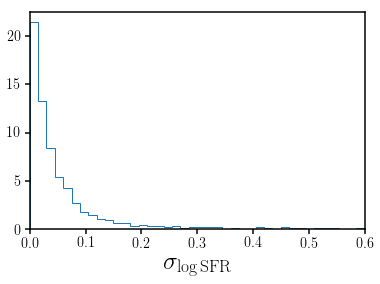

In [11]:
plt.hist(np.array(sigs), bins=40, range=[0.0, 0.6], normed=True, histtype='step')
plt.xlim([0., 0.6])
plt.xlabel('$\sigma_\mathrm{log\,SFR}$', fontsize=25)